# <font color="purple">IRIS dataset </font>
***

### Summary of IRIS dataset:
***

The IRIS dataset, created in 1936, is a popular dataset commonly used for exploring data analysis and data visualisation.

The dataset consists of measurements for 3 different species (setosa, versicolor and virginica) of Iris flowers.  
There are 50 entries per species detailed in the dataset.

#### Species:
|Setosa    |Versicolor | Virginica|
|-----------|---------------|------------|
|![Setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)|![Versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/320px-Iris_versicolor_3.jpg)|![Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg)|

As the species variable are plain text, the data type string will be applicable here.

Four characteristics of the flowers were tracked including sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm).  
These four varaibles are numeric values and looking at the raw data we can see decimal places are present. 
With this, the data type used for this variables will be float.

 

### How to run analysis.py program:
***

### analysis.py code explained: 
***

#### Libaries used:
***

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# fetching data from csv file
df = pd.read_csv('iris_data.csv')

In [138]:
# Filter the dataset based on species to be able to seperate and compare the variables and differientate per species
# setosa, versicolor and virginica

setosa_df = df[df['class'] == 'Iris-setosa']
versicolor_df = df[df['class'] == 'Iris-versicolor']
virginica_df = df[df['class'] == 'Iris-virginica']


In [139]:
# taking a quick look at the data to verify it's loaded
print (df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

              class  
0    

In [140]:
# Show the different types of values in the data set
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                 object
dtype: object

In [141]:
# Highlevel summary of dataset for the numerical columns 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [155]:
count_class = df["class"].value_counts() # getting the count of the male and female entries in the dataset
print(count_class) # printing the counts



class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Historgrams:

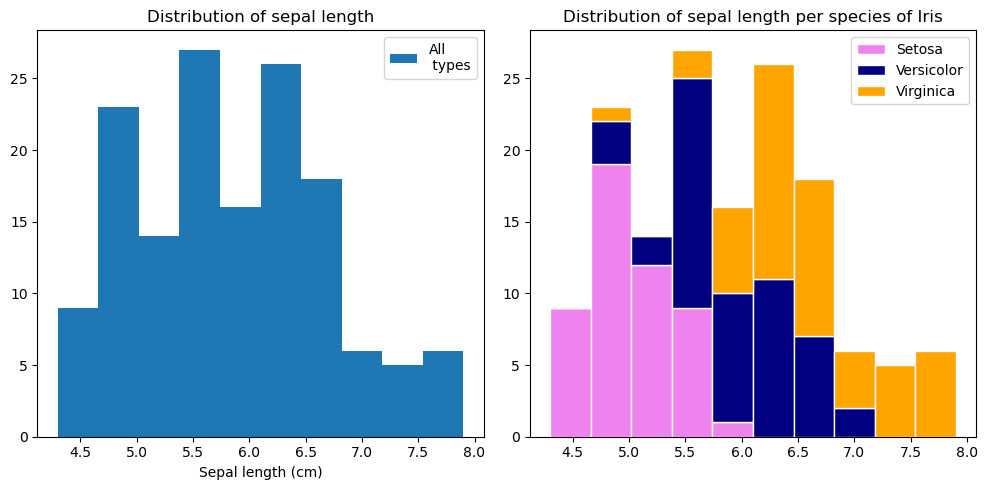

<Figure size 640x480 with 0 Axes>

In [142]:
# sepal length (cm)	

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["sepal length (cm)"], label= 'All\n types')
plt.xlabel('Sepal length (cm)') # setting label for x axis 
plt.title("Distribution of sepal length") # setting plot title
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_sepal_lengths = [setosa_df['sepal length (cm)'], versicolor_df['sepal length (cm)'], virginica_df['sepal length (cm)']]

# Plotting a histogram
plt.hist(all_sepal_lengths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of sepal length per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()
   # plt.savefig("1_sepal_length_hist.png") # saving histogram as PNG file
plt.show() # showing the plot

plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

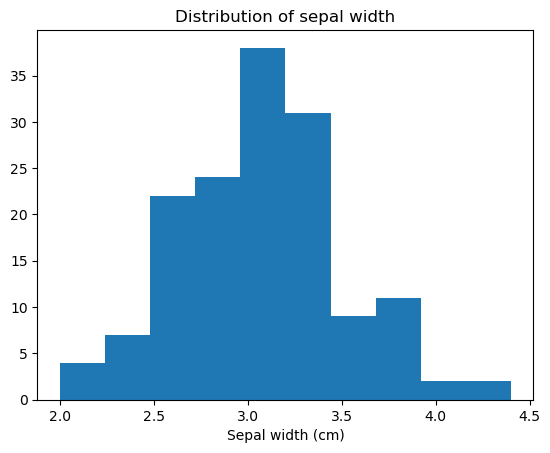

<Figure size 640x480 with 0 Axes>

In [143]:
# sepal width (cm)	

plt.hist(df["sepal width (cm)"])
plt.xlabel('Sepal width (cm)') # setting label for x axis 
plt.title("Distribution of sepal width") # setting plot title
#plt.savefig("sepal_width_hist.png")
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

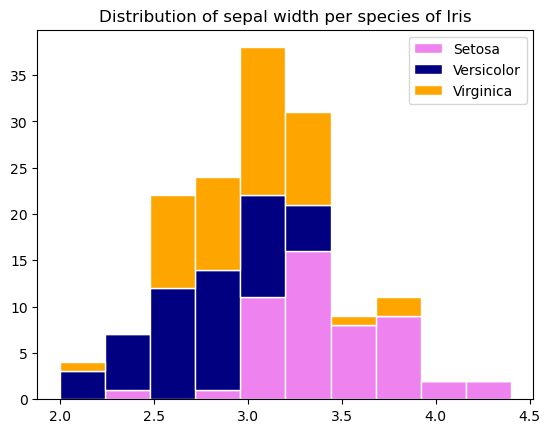

<Figure size 640x480 with 0 Axes>

In [144]:
# Concatenate the petal width data from all three species
all_sepal_widths = [setosa_df['sepal width (cm)'], versicolor_df['sepal width (cm)'], virginica_df['sepal width (cm)']]

# Plotting a histogram
plt.hist(all_sepal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of sepal width per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot

plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

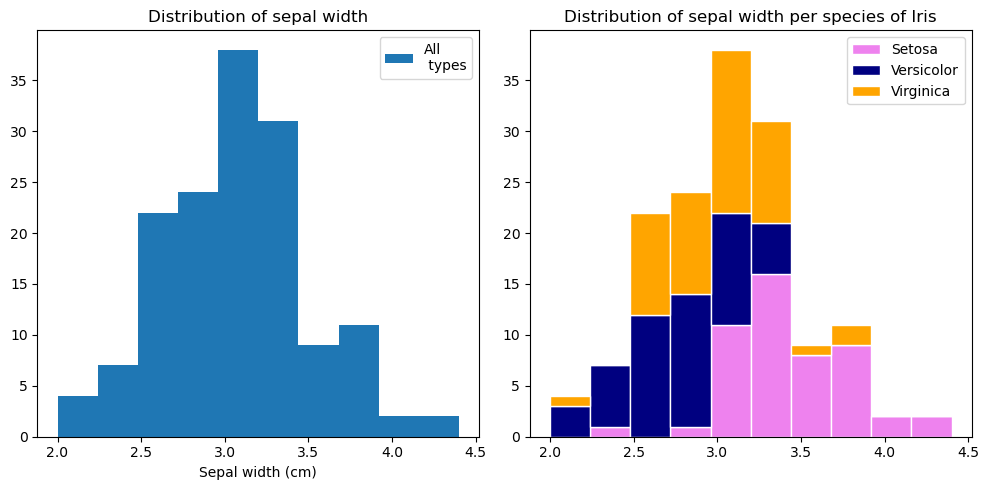

<Figure size 640x480 with 0 Axes>

In [145]:
# sepal width (cm)	

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["sepal width (cm)"], label= 'All\n types')
plt.xlabel('Sepal width (cm)') # setting label for x axis 
plt.title("Distribution of sepal width") # setting plot title
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_sepal_widths = [setosa_df['sepal width (cm)'], versicolor_df['sepal width (cm)'], virginica_df['sepal width (cm)']]

# Plotting a histogram
plt.hist(all_sepal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of sepal width per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()
plt.show() # showing the plot

plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

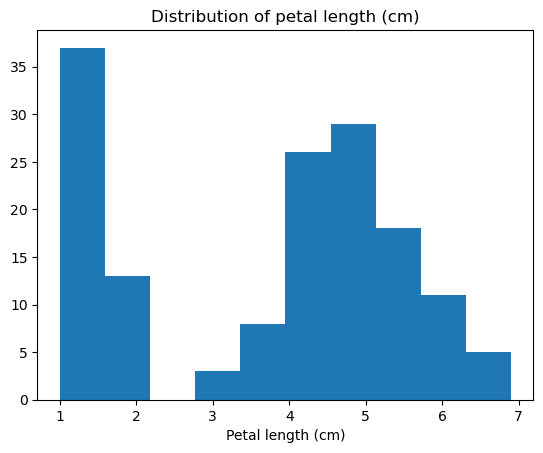

<Figure size 640x480 with 0 Axes>

In [146]:
# petal length (cm)	

plt.hist(df["petal length (cm)"])
plt.xlabel('Petal length (cm)') # setting label for x axis 
plt.title("Distribution of petal length (cm)") # setting plot title
#plt.savefig("petal_length_hist.png")
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

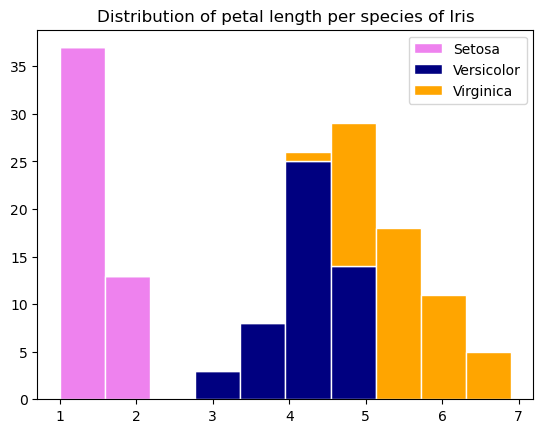

<Figure size 640x480 with 0 Axes>

In [147]:
# Plotting a histogram showing the distribution of petal width across the dataset showing the additional context depending on the species of Iris

# Concatenate the petal width data from all three species
all_petal_lengths = [setosa_df['petal length (cm)'], versicolor_df['petal length (cm)'], virginica_df['petal length (cm)']]

# Plotting a histogram
plt.hist(all_petal_lengths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal length per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

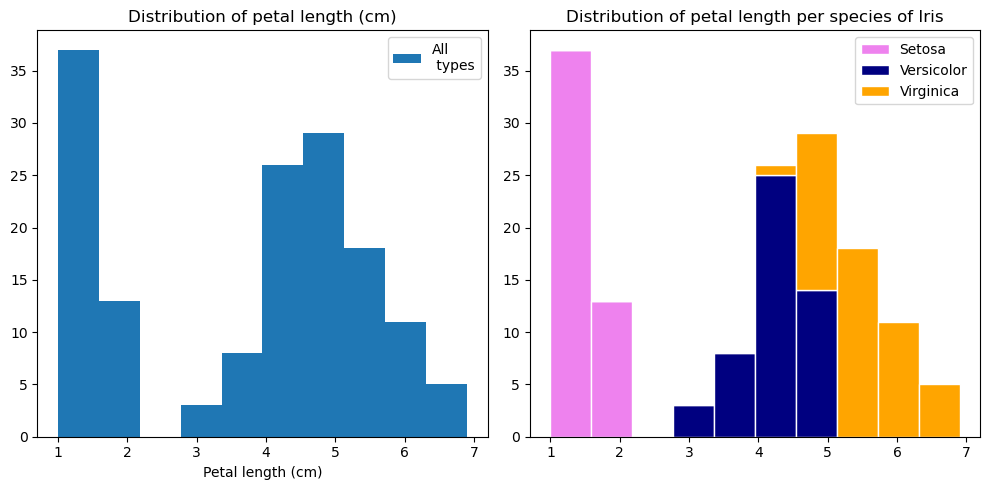

In [148]:
# petal length (cm)	
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["petal length (cm)"], label= 'All\n types')
plt.xlabel('Petal length (cm)') # setting label for x axis 
plt.title("Distribution of petal length (cm)") # setting plot title
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_petal_lengths = [setosa_df['petal length (cm)'], versicolor_df['petal length (cm)'], virginica_df['petal length (cm)']]

# Plotting a histogram
plt.hist(all_petal_lengths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal length per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()

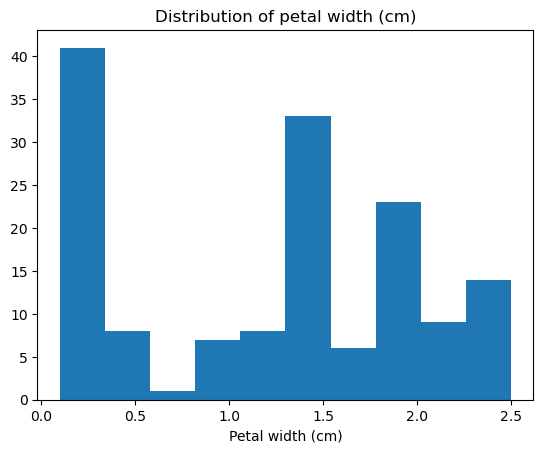

<Figure size 640x480 with 0 Axes>

In [149]:
# petal width (cm)

plt.hist(df["petal width (cm)"])
plt.xlabel('Petal width (cm)') # setting label for x axis 
plt.title("Distribution of petal width (cm)") # setting plot title
# plt.savefig("petal_width_hist.png")
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

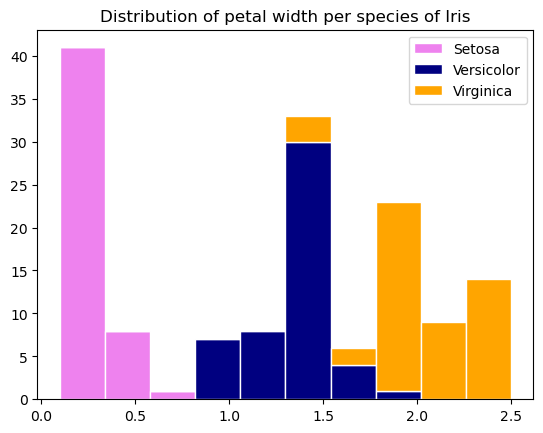

<Figure size 640x480 with 0 Axes>

In [150]:
# Plotting a histogram showing the distribution of petal width across the dataset showing the additional context depending on the species of Iris

# Concatenate the petal width data from all three species
all_petal_widths = [setosa_df['petal width (cm)'], versicolor_df['petal width (cm)'], virginica_df['petal width (cm)']]

# Plotting a histogram
plt.hist(all_petal_widths,
         bins=10,
         stacked=True,
         label=['Setosa', 'Versicolor', 'Virginica'],
         edgecolor='white',
         color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal width per species of Iris") # setting plot title
plt.legend()
plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

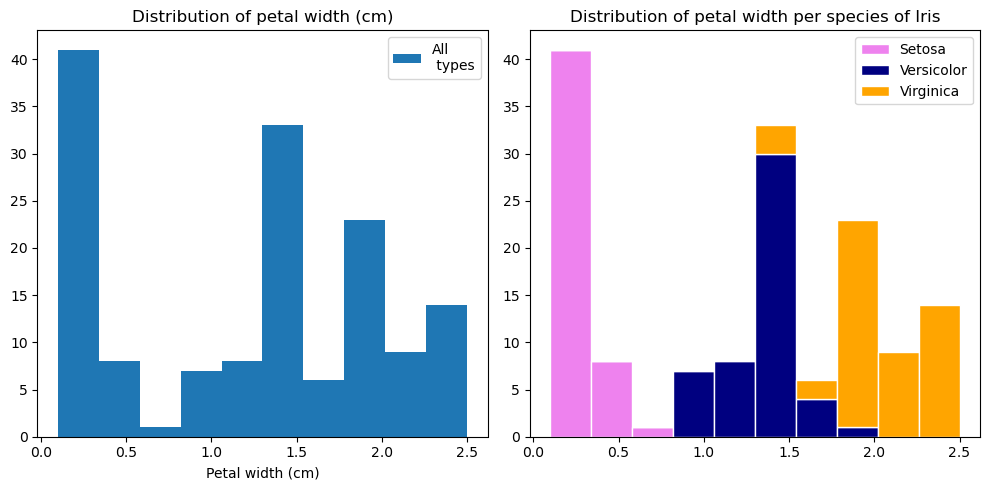

<Figure size 640x480 with 0 Axes>

In [151]:
# Creating histogram for petal width
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(df["petal width (cm)"], label= 'All\n types')
plt.xlabel('Petal width (cm)') # setting label for x axis 
plt.title("Distribution of petal width (cm)") # setting plot title
# plt.savefig("petal_width_hist.png")
plt.legend()
#plt.savefig("sepal_length_hist.png")

plt.subplot(1, 2, 2)
# Concatenate the petal width data from all three species
all_petal_widths = [setosa_df['petal width (cm)'], versicolor_df['petal width (cm)'], virginica_df['petal width (cm)']]

# Plotting a histogram
plt.hist(all_petal_widths,
        bins=10,
        stacked=True,
        label=['Setosa', 'Versicolor', 'Virginica'],
        edgecolor='white',
        color=['violet', 'navy', 'orange'])
plt.title("Distribution of petal width per species of Iris") # setting plot title
plt.tight_layout()
plt.legend()

plt.show() # showing the plot
plt.clf() # clears the current plot to allow a fresh plot for the next histogram to be created

In [152]:

setosa_sepal_length = setosa_df['sepal length (cm)'].to_numpy()
setosa_sepal_width = setosa_df['sepal width (cm)']
setosa_petal_length = setosa_df['petal length (cm)']
setosa_petal_width = setosa_df['petal width (cm)']

versicolor_sepal_length = versicolor_df['sepal length (cm)']
versicolor_sepal_width = versicolor_df['sepal width (cm)']
versicolor_petal_length = versicolor_df['petal length (cm)']
versicolor_petal_width = versicolor_df['petal width (cm)']

virginica_sepal_length = virginica_df['sepal length (cm)']
virginica_sepal_width = virginica_df['sepal width (cm)']
virginica_petal_length = virginica_df['petal length (cm)']
virginica_petal_width = virginica_df['petal width (cm)']

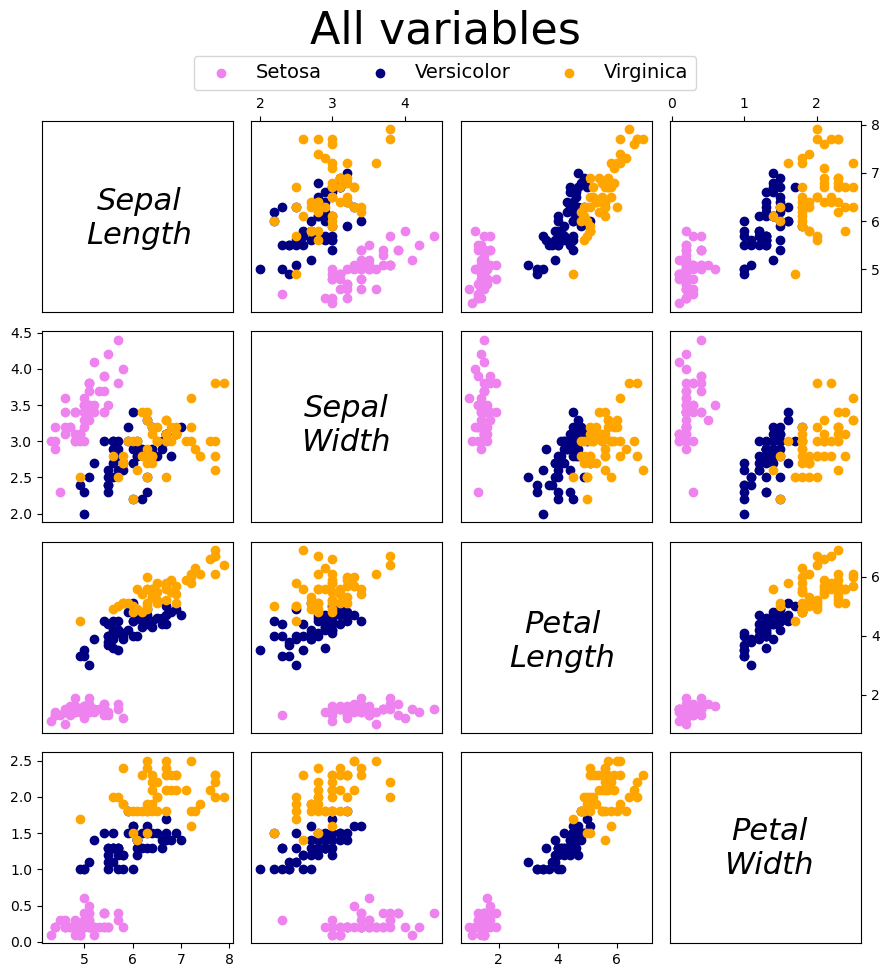

In [153]:
# Setting variables for comparison across the species which will be used for the subplots
# sepal length vs sepal width, sepal length vs petal length, sepal length vs petal width
# sepal width vs petal length, sepal width vs petal width
# petal length vs petal width
# petal width
plt.figure(figsize=(9, 9))
plt.subplots_adjust(top=1)

plt.subplot(4, 4, 1)  # Creating a subplot for sepal length vs sepal width
plt.figtext(.16, .82, 'Sepal\nLength', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 2)  # Creating a subplot for sepal length vs petal length
plt.scatter(setosa_sepal_width,     setosa_sepal_length,        color='violet', label='Setosa')
plt.scatter(versicolor_sepal_width, versicolor_sepal_length, color='navy', label='Versicolor')
plt.scatter(virginica_sepal_width,  virginica_sepal_length,     color='orange', label='Virginica')
plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.yticks([])

plt.subplot(4, 4, 3)  # Creating a subplot for sepal length vs petal width
plt.scatter(setosa_petal_length,     setosa_sepal_length,        color='violet')
plt.scatter(versicolor_petal_length, versicolor_sepal_length, color='navy')
plt.scatter(virginica_petal_length,  virginica_sepal_length,     color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 4) # Creating plot for sepal width vs petal length
plt.scatter(setosa_petal_width,     setosa_sepal_length,        color='violet')
plt.scatter(versicolor_petal_width, versicolor_sepal_length, color='navy')
plt.scatter(virginica_petal_width,  virginica_sepal_length,     color='orange')
plt.tick_params(axis='x', direction='out', top=True, labeltop=True, bottom=False, labelbottom=False)
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.subplot(4, 4, 5) # Creating plot for sepal width vs petal width
plt.scatter(setosa_sepal_length,     setosa_sepal_width,        color='violet')
plt.scatter(versicolor_sepal_length, versicolor_sepal_width, color='navy')
plt.scatter(virginica_sepal_length,  virginica_sepal_width,     color='orange')
plt.xticks([])

plt.subplot(4, 4, 6) # Creating plot for petal length vs petal width
plt.figtext(.39, .59, 'Sepal\nWidth', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 7)
plt.scatter( setosa_petal_length, setosa_sepal_width,     color='violet')
plt.scatter( versicolor_petal_length, versicolor_sepal_width, color='navy')
plt.scatter( virginica_petal_length, virginica_sepal_width,  color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 8)
plt.scatter(setosa_petal_width,  setosa_sepal_width,     color='violet')
plt.scatter(versicolor_petal_width,  versicolor_sepal_width, color='navy')
plt.scatter(virginica_petal_width,  virginica_sepal_width,  color='orange')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4, 9)
plt.scatter(setosa_sepal_length , setosa_petal_length,     color='violet')
plt.scatter(versicolor_sepal_length , versicolor_petal_length, color='navy')
plt.scatter(virginica_sepal_length , virginica_petal_length,  color='orange')
plt.xticks([])
plt.yticks([])

plt.subplot(4, 4, 10)
plt.scatter(setosa_sepal_width,     setosa_petal_length,        color='violet')
plt.scatter(versicolor_sepal_width, versicolor_petal_length, color='navy')
plt.scatter(virginica_sepal_width,  virginica_petal_length,     color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 11)
plt.figtext(.63, .35, 'Petal\nLength', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 12)
plt.scatter(setosa_petal_width, setosa_petal_length,     color='violet')
plt.scatter(versicolor_petal_width, versicolor_petal_length, color='navy')
plt.scatter(virginica_petal_width, virginica_petal_length,  color='orange')
plt.xticks([])
# Adjusting ticks on y-axis
plt.tick_params(axis='y', direction='out', right=True, labelright=True, left=False, labelleft=False)

plt.subplot(4, 4, 13)
plt.scatter(setosa_sepal_length, setosa_petal_width,     color='violet')
plt.scatter(versicolor_sepal_length, versicolor_petal_width, color='navy')
plt.scatter(virginica_sepal_length, virginica_petal_width,  color='orange')

plt.subplot(4, 4, 14)
plt.scatter(setosa_sepal_width, setosa_petal_width,     color='violet')
plt.scatter(versicolor_sepal_width, versicolor_petal_width, color='navy')
plt.scatter(virginica_sepal_width, virginica_petal_width,  color='orange')
plt.yticks([])
plt.xticks([])

plt.subplot(4, 4, 15)
plt.scatter(setosa_petal_length, setosa_petal_width,     color='violet')
plt.scatter(versicolor_petal_length, versicolor_petal_width, color='navy')
plt.scatter(virginica_petal_length, virginica_petal_width,  color='orange')
plt.yticks([])

plt.subplot(4, 4, 16) 
plt.figtext(.86, .12, 'Petal\nWidth', ha='center', fontsize=22, fontstyle='italic')
plt.yticks([])
plt.xticks([])

plt.tight_layout()
plt.suptitle('All variables', y=1.08, fontsize=32)
plt.figlegend(loc = "upper center", ncols = 3, bbox_to_anchor=(0.5, 1.04), fontsize=14) # creating one legend for the subplots and setting it's location to the top center for the plot
#plt.savefig("5_all_variables_scatter.png", bbox_inches='tight') # saving scatter plot as PNG file with bbox_inches set to tight to adjust the title
plt.show()



In [ ]:
# Filtering the dataset based on variables
sepal_length = df['sepal length (cm)']
sepal_width = df['sepal width (cm)']
petal_length = df['petal length (cm)']
petal_width = df['petal width (cm)']

#### Next actions/To-do list:

- Create all code needed in this notebook first to enable easy checking of batches of code
- Update python file after piece of code is validated
    - Add code which outputs a summary of each variable to single text file
    - ~~Add code to create histograms of each variables to png files~~
    - ~~Add code to create s scatter plot of each pair of variables~~

- ~~Create subplot which shows all variables against each other~~
- Create histogram of each variable:
    - ~~Write code first which generates the histograms for each variable~~
    - Point to consider: Would it be interesting to created stacked histogram of the variables showing variables for the different species
    - ~~Enhance so that histograms are saved to seperate png files~~
- Add extra analysis and commentary to accompany the plots in notebook
- Decide if README will be a jupyter notebook or just .md file

***
## End